In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fe = feature_extraction()
base_path = '/home/grads/y/yashzambre/Desktop/YASH/plantpattern/'
images = os.listdir(base_path+'Analysis/')

In [ ]:
for img in images:
    fmt = img.split('.')
    if fmt[-1] == 'png' or fmt[-1] == 'PNG':
        img_dir = base_path +'Analysis/' +img
        feature = fe.extract(img=Image.open(img_dir))
        # Save the Numpy array (.npy) on designated path
        feature_path = base_path +'trained_features/' + fmt[0] + '.npy'
        np.save(feature_path, feature)


In [ ]:
feat_dir = base_path +'trained_features/'
train_feat = os.listdir(feat_dir)
features = []

for feat in train_feat:
    features.append(np.load(feat_dir + feat))

features = np.array(features)
(n,d) = features.shape

In [ ]:
img_path = base_path +'dataset/'
test_img = base_path + 'test2.png'
import math

img = Image.open(test_img)
img_read= plt.imread(test_img)
test_feat = fe.extract(img)
dists = np.zeros(n)
l1 = img_read[:,:,0]
l2 = img_read[:,:,1]
l3 = img_read[:,:,2]
l4 = img_read[:,:,3]

dists = np.linalg.norm(features - test_feat, axis=1)

idx = np.argsort(dists)[1:]
scores = []
for i in idx:
    img_dir = img_path + images[i]
    scores.append((dists[i], img_dir))
    #print(scores)
    
# Visualize the result
plt.imshow(Image.open(test_img))
plt.show()

axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(1*1):
    score = scores[a]
    ax = fig.subplots(1, 3, sharey=True)
    #axes.append(fig.add_subplot(1, 1, a+1))
    ax[0].imshow(np.concatenate((l1[...,None], l3[...,None], l2[...,None]),axis=2), origin="upper")
    subplot_title=str(math.floor(score[0]*100))
    #axes[-1].set_title(subplot_title)  
    #axes[-1].imshow(np.concatenate((l1[...,None], l3[...,None], l2[...,None]),axis=2), origin="upper")
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

In [ ]:
img_path = base_path +'Analysis/'
test_img = base_path + 'test2.png'

img = Image.open(test_img)
test_feat = fe.extract(img)
x_axis = []
y_axis = []

for i in range(int(n/50), n , int(n/50)):
    dists = np.zeros(i)
    dists = np.linalg.norm(features[np.random.choice(n,i),:] - test_feat, axis=1)
    idx = np.argsort(dists)[:30]
    x_axis.append(i)
    max = dists[idx[-1]]
    if max > 1:
        max = max-1
    y_axis.append(max*100)


idx = np.argsort(dists)[:30]
scores = []
for i in idx:
    img_dir = img_path + images[i]
    scores.append((dists[i], img_dir))
    
# # Visualize the result
plt.imshow(Image.open(test_img))
plt.show()

axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()
y = y_axis.reverse()
plt.plot(x_axis, y_axis[::-1])
plt.title("Feature space vs accuracy")
plt.xlabel("Size of the dataset")
plt.ylabel("Accuracy (%)")
plt.show()

1/1 [==============================] - 0s 89ms/step


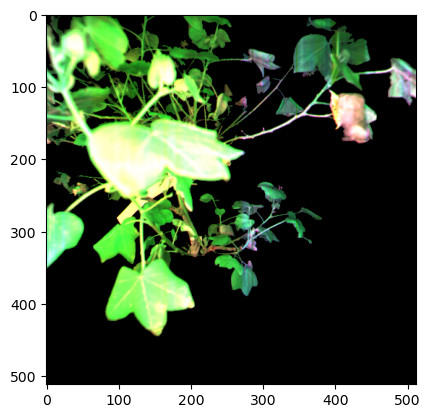

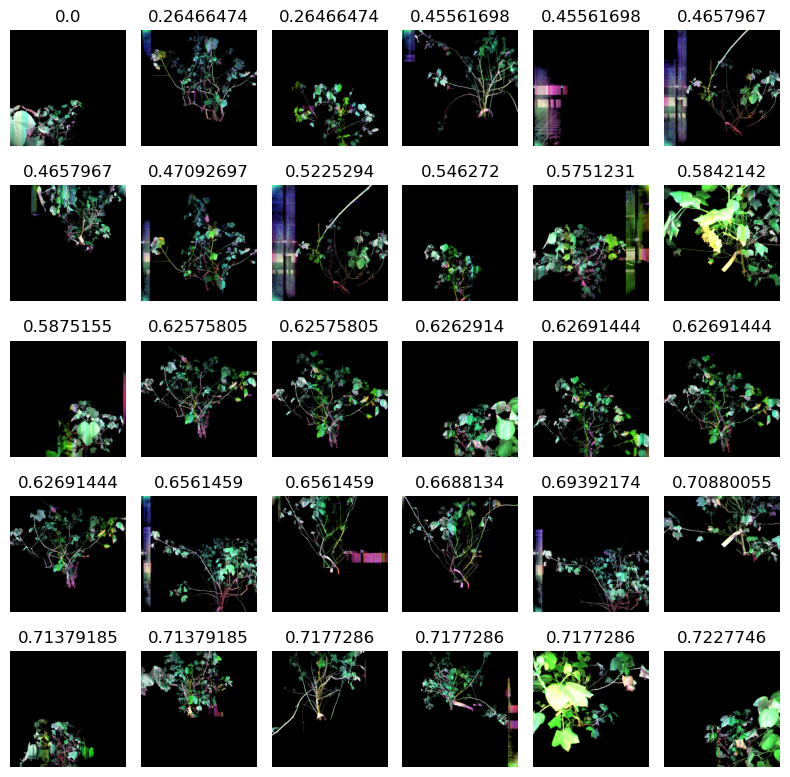

In [33]:
import numpy as np
from matplotlib import pyplot as plt
img_path = base_path +'dataset/'
test_img = base_path + 'test2.png'

img = Image.open(test_img)
arr=plt.imread('test2.png')
l1 = arr[:,:,0]
l2 = arr[:,:,1]
l3 = arr[:,:,2]

test_feat = fe.extract(img)
x_axis = []
y_axis = []

for i in range(int(n/50), n , int(n/50)):
    dists = np.zeros(i)
    dists = np.linalg.norm(features[np.random.choice(n,i),:] - test_feat, axis=1)
    idx = np.argsort(dists)[:30]
    x_axis.append(i)
    max = dists[idx[-1]]
    if max > 1:
        max = max-1
    y_axis.append(max*100)


idx = np.argsort(dists)[:30]
scores = []
for i in idx:
    img_dir = img_path + images[i]
    scores.append((dists[i], img_dir))
    
# # Visualize the result
plt.imshow(np.concatenate((l1[...,None], l3[...,None], l2[...,None]),axis=2), origin="upper")
plt.show()

axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(5*6):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    arr1=plt.imread(score[1])
    l1 = arr1[:,:,0]
    l2 = arr1[:,:,1]
    l3 = arr1[:,:,2]
    plt.imshow(np.concatenate((l1[...,None], l3[...,None], l2[...,None]),axis=2), origin="upper")
fig.tight_layout()
plt.show()



In [ ]:

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

img = mimg.imread('test2.png')
img1 = img[:, :, 0]
img2 = img[:, :, 1]
img3 = img[:, :, 2]
img4 = img[:, :, 3]

print(img2.shape)
plt.imshow(img)
plt.imshow(img1)
plt.imshow(img2)
plt.imshow(img3)
plt.imshow(img4)

plt.axis('off')

plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt


arr = plt.imread("test2.png")
l1 = arr[:,:,0]
l2 = arr[:,:,1]
l3 = arr[:,:,2]
l4 = arr[:,:,3]
fg = plt.figure(figsize=(15, 4))
ax = fg.subplots(1, 4, sharey=True)
ax[0].imshow(np.concatenate((l1[...,None], l2[...,None], l3[...,None]),axis=2), origin="upper")
ax[0].set_title("Original")
ax[1].imshow(np.concatenate((l1[...,None], l3[...,None], l2[...,None]),axis=2), origin="upper")
ax[1].set_title("Swapping 2&3 Image channel")
ax[2].imshow(np.concatenate((l3[...,None], l2[...,None], l1[...,None]),axis=2), origin="upper")
ax[2].set_title("Swapping 1&3 channel")
ax[3].imshow(np.concatenate((l1[...,None],l2[...,None], l3[...,None],l4[...,None]),axis=2), origin="upper")
ax[3].set_title("Swapping 1&3 channel")
fg.tight_layout()
plt.show()